##### 滑鼠選取區域自動馬賽克
這篇教學會延伸「偵測滑鼠事件」和「影像的馬賽克效果」兩篇文章，實作用滑鼠在影像中拖拉出一個四邊形外框，\
放開滑鼠後，四邊形區域就會自動加上馬賽克效果。

因為程式中的 OpenCV 會需要使用鏡頭或 GPU，所以請使用本機環境或使用 Anaconda Jupyter 進行實作，\
並安裝 OpenCV 函式庫 ( 參考：[OpenCV 函式庫](https://steam.oxxostudio.tw/category/python/ai/opencv.html) )。

##### 用滑鼠在影像中拖拉出四邊形 
下方的程式執行後，會先建立兩個空串列記錄兩組座標 ( 繪製四邊形需要兩個對角端點座標 )，接著使用 flag 判斷在滑鼠拖曳事件發生時，\
不斷更新座標位置 ( 第一個座標不更動，不斷更新第二個座標點 )，就能在影像中繪製出四邊形。

* 參考：rectangle() 畫四邊形、[全域變數、區域變數](https://steam.oxxostudio.tw/category/python/basic/global-variable.html)

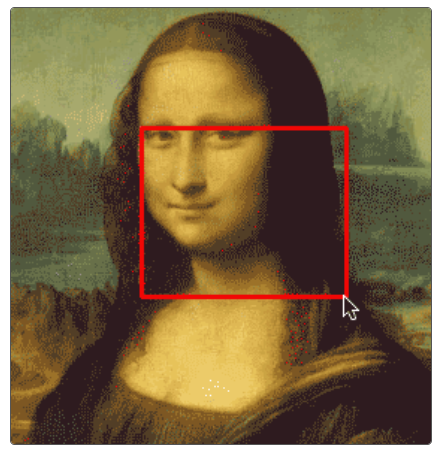

In [ ]:
import cv2

img = cv2.imread('image\Dog.jpg')
dot1 = []                           # 記錄第一個座標
dot2 = []                           # 記錄第二個座標

# 滑鼠事件發生時要執行的函式
def show_xy(event,x,y,flags,param): # event: 事件名稱, x, y: 滑鼠座標, flags: 滑鼠動作, param: 額外資訊
    global dot1, dot2, img          # 在函式內使用全域變數
    # 滑鼠拖曳發生時
    if flags == 1:                  # flags=1 表示滑鼠拖曳中
        if event == 1:              # event=1 表示滑鼠左鍵按下
            dot1 = [x, y]           # 按下滑鼠時記錄第一個座標
        if event == 0:              # event=0 表示滑鼠移動
            img2 = img.copy()       # 拖曳時不斷複製 img
            dot2 = [x, y]           # 拖曳時不斷更新第二個座標
            # 根據兩個座標繪製四邊形
            cv2.rectangle(img2, (dot1[0], dot1[1]), (dot2[0], dot2[1]), (0,0,255), 2)  # 繪製紅色矩形
            # 不斷顯示新圖片 ( 如果不這麼做，會出現一堆四邊形殘影 )
            cv2.imshow('oxxostudio', img2)

cv2.imshow('oxxostudio', img)
cv2.setMouseCallback('oxxostudio', show_xy)

cv2.waitKey(0)   # 按下任意鍵結束
cv2.destroyAllWindows()

將程式稍做修改，加上判斷「滑鼠放開」的事件，就能保留拖曳出的四邊形區域。

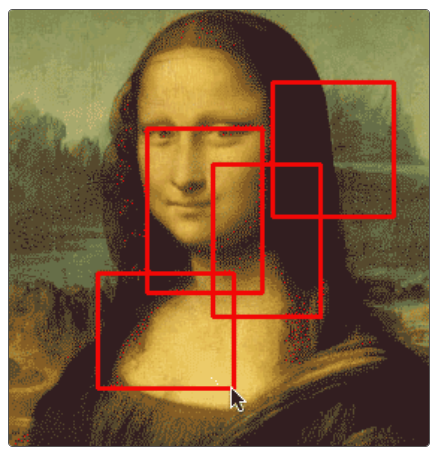

In [ ]:
import cv2

# 讀取影像
img = cv2.imread('image\\Dog.jpg')

# 用來存儲所有的矩形座標
rectangles = []

# 用來標記是否正在繪製矩形
drawing = False

# 記錄第一個座標
dot1 = []

# 記錄第二個座標
dot2 = []

# 定義滑鼠事件的回呼函式
def show_xy(event, x, y, flags, param):
    global dot1, dot2, img, drawing, rectangles

    if event == cv2.EVENT_LBUTTONDOWN:  # 滑鼠左鍵按下
        drawing = True  # 開始繪製矩形
        dot1 = [x, y]  # 記錄起始點座標

    elif event == cv2.EVENT_MOUSEMOVE:  # 滑鼠移動
        if drawing:
            img2 = img.copy()  # 複製影像以便即時顯示矩形
            dot2 = [x, y]  # 記錄當前滑鼠位置作為終點
            # 繪製已經存在的所有矩形
            for rect in rectangles:
                cv2.rectangle(img2, (rect[0][0], rect[0][1]), (rect[1][0], rect[1][1]), (0, 0, 255), 2)
            # 繪製當前正在繪製的矩形
            cv2.rectangle(img2, (dot1[0], dot1[1]), (dot2[0], dot2[1]), (0, 0, 255), 2)
            cv2.imshow('oxxostudio', img2)  # 顯示更新後的影像

    elif event == cv2.EVENT_LBUTTONUP:  # 滑鼠左鍵放開
        drawing = False  # 結束繪製矩形
        dot2 = [x, y]  # 記錄終點座標
        rectangles.append((dot1, dot2))  # 將矩形座標添加到列表中
        # 繪製所有矩形
        for rect in rectangles:
            cv2.rectangle(img, (rect[0][0], rect[0][1]), (rect[1][0], rect[1][1]), (0, 0, 255), 2)
        cv2.imshow('oxxostudio', img)  # 顯示更新後的影像

# 顯示影像
cv2.imshow('oxxostudio', img)

# 設定滑鼠事件的回呼函式
cv2.setMouseCallback('oxxostudio', show_xy)

# 等待按鍵事件並關閉視窗
cv2.waitKey(0)
cv2.destroyAllWindows()

##### 將滑鼠選取區域自動馬賽克 
將上方的程式碼裡，加入「[影像的馬賽克效果](https://steam.oxxostudio.tw/category/python/ai/opencv-mosaic.html)」的範例，就能在拖曳出四邊形區域後，自動將該區域的影像馬賽克。

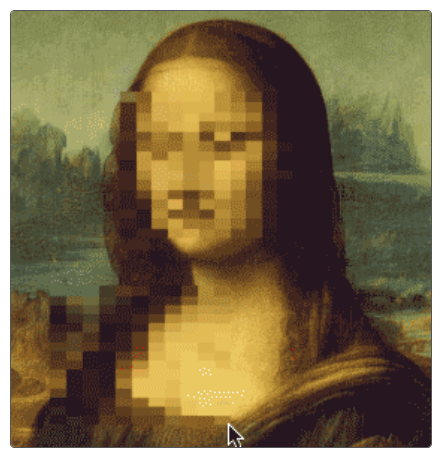

In [ ]:
import cv2

# 讀取影像
img = cv2.imread('image\\Dog.jpg')

# 記錄起始點和終點座標
dot1 = []
dot2 = []

# 定義滑鼠事件的回呼函式
def show_xy(event, x, y, flags, param):
    global dot1, dot2, img, img2

    if event == cv2.EVENT_LBUTTONDOWN:  # 滑鼠左鍵按下
        dot1 = [x, y]  # 記錄起始點座標

    elif event == cv2.EVENT_MOUSEMOVE and flags == cv2.EVENT_FLAG_LBUTTON:  # 滑鼠移動且左鍵按住
        img2 = img.copy()  # 複製影像以便即時顯示矩形
        dot2 = [x, y]  # 記錄當前滑鼠位置作為終點
        cv2.rectangle(img2, (dot1[0], dot1[1]), (dot2[0], dot2[1]), (0, 0, 255), 2)  # 繪製矩形
        cv2.imshow('oxxostudio', img2)  # 顯示更新後的影像

    elif event == cv2.EVENT_LBUTTONUP:  # 滑鼠左鍵放開
        dot2 = [x, y]  # 記錄終點座標
        level = 8  # 縮小比例 (可當作馬賽克的等級)
        h = int((dot2[1] - dot1[1]) / level)  # 按照比例縮小後的高度 (使用 int 去除小數點)
        w = int((dot2[0] - dot1[0]) / level)  # 按照比例縮小後的寬度 (使用 int 去除小數點)
        mosaic = img[dot1[1]:dot2[1], dot1[0]:dot2[0]]  # 取得馬賽克區域
        mosaic = cv2.resize(mosaic, (w, h), interpolation=cv2.INTER_LINEAR)  # 根據縮小尺寸縮小
        mosaic = cv2.resize(mosaic, (dot2[0] - dot1[0], dot2[1] - dot1[1]), interpolation=cv2.INTER_NEAREST)  # 放大到原本的大小
        img[dot1[1]:dot2[1], dot1[0]:dot2[0]] = mosaic  # 置換成馬賽克的影像
        cv2.imshow('oxxostudio', img)  # 顯示更新後的影像

# 顯示影像
cv2.imshow('oxxostudio', img)

# 設定滑鼠事件的回呼函式
cv2.setMouseCallback('oxxostudio', show_xy)

# 等待按鍵事件並關閉視窗
cv2.waitKey(0)
cv2.destroyAllWindows()